
# Real-world data coding for neuroscientists (ReCoN)

### MSc in Translational Neuroscience,

### Department of Brain Sciences, Faculty of Medicine,

### Imperial College London

### Contributors: Marirena Bafaloukou, Anastasia Ilina, Cecilia Rodriguez, Katarzyna Zoltowska, Rishideep Chatterjee, Sahar Rahbar, Cynthia Sandor

### Autumn 2025

# Introduction to Machine Learning: Challenge Solution

# 1. Data Loading

In [1]:
import numpy as np
import pandas as pd


#Stats
from scipy import stats
from scipy.stats import shapiro 
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
from scipy.stats import levene


#Machine Learning
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
import umap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from imblearn.metrics import specificity_score
from sklearn.metrics import ConfusionMatrixDisplay



#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go


/Users/meb22/opt/anaconda3/envs/intropython/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv("Data_for_challenge.csv", index_col="patient_id")

# 2. Explore Relationships with Clinical Variables


In [3]:
data

,SESTD1,GLT8D2,IFNL1,LIF,IDI2,PXN,LYPD1,ARID4B,SIRT5,SMARCA2,...,CXCL3,LGMN,LGALS9,NME3,CCL24,CHRDL1,intestinal_organ_age,constipation,hyposmia,UPDRS_III
patient_id,,,,,,,,,,,,,,,,,,,,,
Patient_1,-1.228121,-1.863100,-1.077147,-0.201805,-1.958989,-1.958972,-0.145623,-0.957401,-2.194310,-1.182275,...,0.421363,1.329958,0.713386,-0.138456,-1.224298,-0.209023,0.792222,21,25,89
Patient_2,-2.345327,-2.075330,-0.906229,0.175098,-1.100135,-2.690690,-1.050204,-0.298175,-2.104590,-1.628824,...,-1.205985,0.257852,-0.681850,-0.064188,0.091752,0.252240,0.384832,9,37,45
Patient_3,-0.669003,-0.338061,1.025344,0.432676,0.316380,-1.008314,-1.442015,0.402526,0.323273,0.919897,...,-1.484162,-2.289551,-2.086441,-0.686279,-1.432671,0.145836,0.673012,19,22,69
Patient_4,0.581562,0.511146,0.816187,0.320602,-0.536463,0.835926,-1.361255,-0.904409,-0.967938,1.076318,...,1.658789,-2.262836,-2.189932,-0.565393,0.243135,-0.470203,0.550539,18,27,50
Patient_5,-1.623131,-3.214052,-3.617055,-4.033678,-4.459038,-2.753533,-2.536444,-2.866901,-0.992058,-1.007433,...,1.555274,2.077319,1.771569,0.223927,-1.946525,-1.117928,0.401617,9,31,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patient_496,-1.333088,-1.264293,-1.391665,-2.212286,-1.130178,-2.483488,-0.760237,-2.145844,-1.676369,-2.751525,...,0.235696,2.438759,2.689798,-0.264506,-0.494044,-1.039593,0.508181,14,28,62
Patient_497,-1.440400,-0.875146,-1.120414,-1.008363,-1.374446,-1.135456,-0.348458,-2.403255,-2.476602,-1.124112,...,0.537586,-0.258866,-0.848946,-0.159162,0.935267,-0.095964,0.566874,11,35,43
Patient_498,0.293914,0.185372,0.249916,0.156318,-1.629938,1.893390,-0.682822,0.734281,1.545639,-0.233981,...,-1.649047,1.618818,-0.897804,-0.852977,-1.343268,-0.236839,0.520595,12,32,34


In [4]:
clinical_variables = ["constipation","hyposmia","UPDRS_III","intestinal_organ_age"]

In [5]:
# Compute correlations
corr_matrix = data[clinical_variables].corr()
print(corr_matrix)

# Focus on intestinal organ age
print("\nCorrelations with intestinal organ age:")
print(corr_matrix['intestinal_organ_age'].sort_values(ascending=False))


                      constipation  hyposmia  UPDRS_III  intestinal_organ_age
constipation              1.000000 -0.907582   0.674545              0.824560
hyposmia                 -0.907582  1.000000  -0.693728             -0.740817
UPDRS_III                 0.674545 -0.693728   1.000000              0.524778
intestinal_organ_age      0.824560 -0.740817   0.524778              1.000000

Correlations with intestinal organ age:
intestinal_organ_age    1.000000
constipation            0.824560
UPDRS_III               0.524778
hyposmia               -0.740817
Name: intestinal_organ_age, dtype: float64


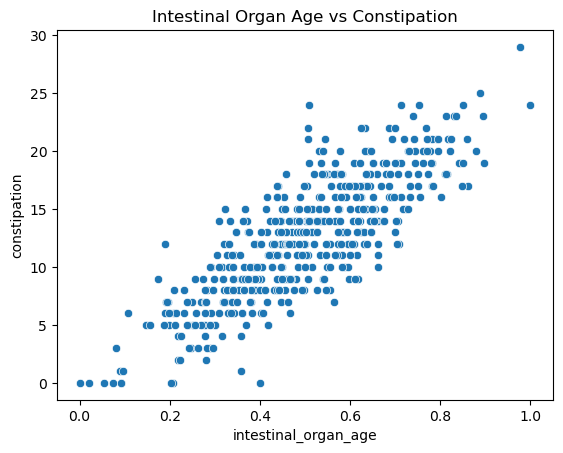

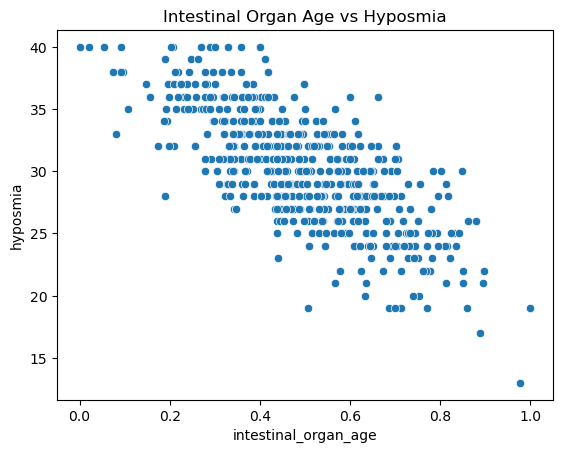

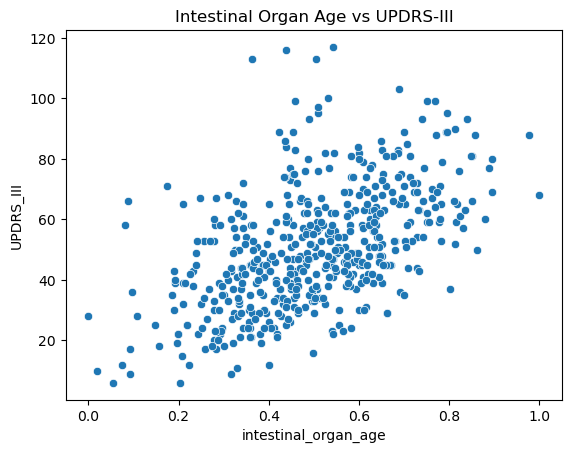

In [ ]:
# Scatterplots
# organ age vs constipation
sns.scatterplot(x='intestinal_organ_age', y='constipation', data=data)
plt.title("Intestinal Organ Age vs Constipation")
plt.show()

# organ age vs hyposmia
sns.scatterplot(x='intestinal_organ_age', y='hyposmia', data=data)
plt.title("Intestinal Organ Age vs Hyposmia")
plt.show()

# organ age vs UPDRS_III
sns.scatterplot(x='intestinal_organ_age', y='UPDRS_III', data=data)
plt.title("Intestinal Organ Age vs UPDRS-III")
plt.show()


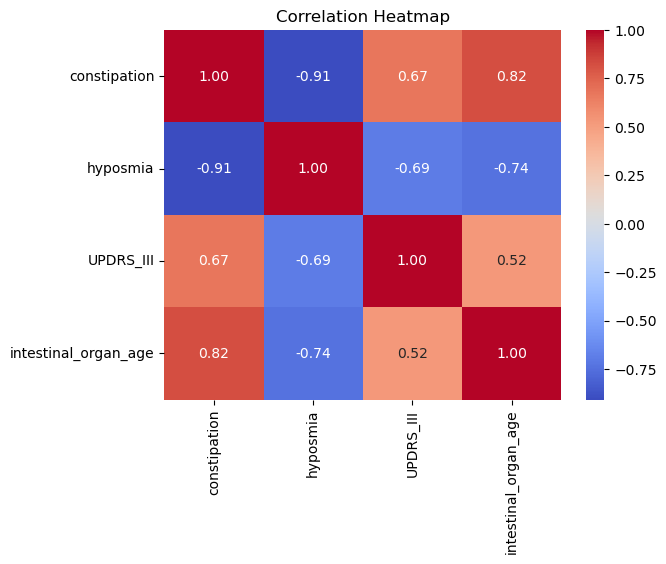

In [7]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# 3. Regression Task: Predict Organ Age

In [8]:
protein_cols = data.columns[1:-4]
X= data[protein_cols]
y = data["intestinal_organ_age"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42 )

In [ ]:
scaler = StandardScaler() 

In [10]:


def evaluate_regression_feature_set(X_train, X_test, y_train, y_test, feature_set_name, scale=True):
    """
    Trains a regression model and returns R², MAE, and MSE in a DataFrame.
    
    Parameters
    ----------
    X_train, X_test : array-like
        Training and testing feature matrices.
    y_train, y_test : array-like
        Training and testing target values.
    feature_set_name : str
        Label for the feature set (for tracking in metrics).
    scale : bool, default=True
        Whether to scale data using StandardScaler.
        
    Returns
    -------
    metrics_df : pd.DataFrame
        DataFrame with columns: ['feature_set', 'R2', 'MAE', 'MSE', 'scaled']
    """
    # --- 1. Optional scaling ---
    model = LinearRegression() 
    if scale:
        scaler = StandardScaler()
        X_train_proc = scaler.fit_transform(X_train)
        X_test_proc = scaler.transform(X_test)
    else:
        X_train_proc = X_train
        X_test_proc = X_test

    # --- 2. Fit model ---
    model.fit(X_train_proc, y_train)
    
    # --- 3. Predict ---
    y_pred = model.predict(X_test_proc)
    
    # --- 4. Compute metrics ---
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # --- 5. Return results ---
    metrics_df = pd.DataFrame({
        "feature_set": [feature_set_name],
        "R2": [r2],
        "MAE": [mae],
        "MSE": [mse],
        "scaled": [scale]
    })
    
    return metrics_df


In [11]:
results_all_reg = evaluate_regression_feature_set(
    X_train_reg, X_test_reg, y_train_reg, y_test_reg, 
    feature_set_name="All", 
    scale=True)


## Feature selection: Checking features for statistical significance 

In [12]:
X_features = data[data.index.isin(X_train_reg.index)]

In [13]:

results = []
for protein in protein_cols:
    stat, p = shapiro(X_features[protein])
    results.append({"protein": protein, "stat": stat, "p_value": p, "is_normal": p > 0.05})

normality_df = pd.DataFrame(results)
print(normality_df.head())


  protein      stat   p_value  is_normal
0  GLT8D2  0.992717  0.048927      False
1   IFNL1  0.997001  0.675873       True
2     LIF  0.995841  0.373685       True
3    IDI2  0.996826  0.625816       True
4     PXN  0.993635  0.091018       True


In [14]:
results = []

for protein in protein_cols:
    corr, p_value = pearsonr(data[protein], data['intestinal_organ_age'])
    results.append({
        "protein": protein,
        "correlation_coeff": corr,
        "p_value": p_value
    })

correlations_df = pd.DataFrame(results).sort_values(by="correlation_coeff", ascending=False)
print(correlations_df)


     protein  correlation_coeff        p_value
628    ITGAV           0.794061  9.527243e-110
1325   VEGFA           0.702307   1.594339e-75
1010     FAS           0.665836   2.404650e-65
98       IL6           0.654778   1.543861e-62
48       TNF           0.642844   1.226873e-59
...      ...                ...            ...
236    PPCDC          -0.195567   1.059443e-05
270     JAM2          -0.197641   8.495185e-06
31     DUSP3          -0.198046   8.133702e-06
1395   CCL22          -0.202185   5.193021e-06
1443   FSTL3          -0.209836   2.210791e-06

[1462 rows x 3 columns]


In [15]:
correlations_df

,protein,correlation_coeff,p_value
628,ITGAV,0.794061,9.527243e-110
1325,VEGFA,0.702307,1.594339e-75
1010,FAS,0.665836,2.404650e-65
98,IL6,0.654778,1.543861e-62
48,TNF,0.642844,1.226873e-59
...,...,...,...
236,PPCDC,-0.195567,1.059443e-05
270,JAM2,-0.197641,8.495185e-06
31,DUSP3,-0.198046,8.133702e-06
1395,CCL22,-0.202185,5.193021e-06


In [16]:
reject, pvals_corrected, _, _ = multipletests(correlations_df["p_value"], method="bonferroni")
correlations_df["p_value_bonferroni"] = pvals_corrected
correlations_df["significant"] = reject
correlations_df = correlations_df.sort_values(by="correlation_coeff", ascending=False)

print(correlations_df)


     protein  correlation_coeff        p_value  p_value_bonferroni  \
628    ITGAV           0.794061  9.527243e-110       1.392883e-106   
1325   VEGFA           0.702307   1.594339e-75        2.330924e-72   
1010     FAS           0.665836   2.404650e-65        3.515599e-62   
98       IL6           0.654778   1.543861e-62        2.257124e-59   
48       TNF           0.642844   1.226873e-59        1.793689e-56   
...      ...                ...            ...                 ...   
236    PPCDC          -0.195567   1.059443e-05        1.548906e-02   
270     JAM2          -0.197641   8.495185e-06        1.241996e-02   
31     DUSP3          -0.198046   8.133702e-06        1.189147e-02   
1395   CCL22          -0.202185   5.193021e-06        7.592197e-03   
1443   FSTL3          -0.209836   2.210791e-06        3.232176e-03   

      significant  
628          True  
1325         True  
1010         True  
98           True  
48           True  
...           ...  
236          True  

In [17]:
significant_cols = correlations_df[correlations_df["significant"] == True]["protein"].tolist()

In [18]:
len(significant_cols)

58

In [19]:
results_significant_reg = evaluate_regression_feature_set(
    X_train_reg[significant_cols], X_test_reg[significant_cols], y_train_reg, y_test_reg, 
    feature_set_name="Significant", 
    scale=True)


In [20]:
scaler = StandardScaler()
X_train_scaled_reg = scaler.fit_transform(X_train_reg)
X_test_scaled_reg = scaler.transform(X_test_reg)

In [21]:

# Run PCA
pca = PCA()
X_pca = pca.fit_transform(X_train_scaled_reg)

# Explained variance
explained_var = pca.explained_variance_ratio_ * 100
cum_var = explained_var.cumsum()

# Plot with Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=[f"PC{i+1}" for i in range(len(explained_var))],
    y=explained_var,
    name="Individual explained variance (%)"
))

# Line for cumulative variance
fig.add_trace(go.Scatter(
    x=[f"PC{i+1}" for i in range(len(cum_var))],
    y=cum_var,
    mode="lines+markers",
    name="Cumulative explained variance (%)"
))

fig.update_layout(
    title="PCA Explained Variance",
    xaxis_title="Principal Components",
    yaxis_title="Explained Variance (%)",
    template="plotly_white",
    legend=dict(x=0.7, y=0.1)
)

fig.show()

In [22]:
n_components_80 = np.argmax(cum_var >= 80) + 1
print(f"Number of PCs capturing ≥80% variance: {n_components_80}")

Number of PCs capturing ≥80% variance: 157


In [23]:
X_pca_filtered_reg = X_pca[:,n_components_80]

In [24]:
n_components_80

np.int64(157)

# PCA1 with selected PCs based on cumulative variance threshold AND 
# PCA2 with selected PCs based on individual cumulative variance drop. 

In [25]:
pca_1 = PCA(n_components=(n_components_80)) #threshold method for cumulative explained variance method 
pca_2 = PCA(n_components=20) #sudden drop in individual explained variance method 


X_pca_1_reg = pca_1.fit_transform(X_train_scaled_reg)    
X_pca_2_reg = pca_2.fit_transform(X_train_scaled_reg)    

In [26]:
X_pca_test_1_reg = pca_1.transform(X_test_scaled_reg)
X_pca_test_2_reg = pca_2.transform(X_test_scaled_reg)

In [27]:
results_pca1_reg = evaluate_regression_feature_set(
    X_pca_1_reg, X_pca_test_1_reg, y_train_reg, y_test_reg, 
    feature_set_name="PCA1", 
    scale=False)
results_pca2_reg = evaluate_regression_feature_set(
    X_pca_2_reg, X_pca_test_2_reg, y_train_reg, y_test_reg, 
    feature_set_name="PCA2", 
    scale=False)

# UMAP 

In [28]:
umap_model = umap.UMAP(
    n_components=2, 
    n_neighbors=15, 
    min_dist=0.05, 
    random_state=42
)

umap_train = umap_model.fit_transform(X_train_scaled_reg)
umap_test = umap_model.transform(X_test_scaled_reg)


/Users/meb22/opt/anaconda3/envs/intropython/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [29]:
results_umap_reg = evaluate_regression_feature_set(
    umap_train, umap_test, y_train_reg, y_test_reg, 
    feature_set_name="UMAP", 
    scale=False)

In [30]:
all_results_reg = pd.concat([
    results_all_reg,
    results_significant_reg,
    results_pca1_reg,
    results_pca2_reg,
    results_umap_reg
], ignore_index=True)


#  **4. Classification Task: Young vs. Old Organs**

In [31]:

data['organ_age_class'] = (data['intestinal_organ_age'] >= 0.5).astype('category')  # 0 = Young, 1 = Old

X = data[protein_cols]  # use protein features
y = data['organ_age_class'].values

In [32]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()

X_train_scaled_class = scaler.fit_transform(X_train_class)
X_test_scaled_class = scaler.transform(X_test_class)

 # Finding significant features

In [33]:
X_features_class = data[data.index.isin(X_train_class.index)]

In [34]:
# Initialise an empty list
levene_results = [] # Don't change this line

for protein in protein_cols:  
    # Get data for the two groups as levene expects the two different groups. 
    group1 = X_features_class[X_features_class['organ_age_class'] == False][protein] # Don't change this line
    group2 = X_features_class[X_features_class['organ_age_class'] == True][protein] # Don't change this line
    
    # Levene's test
    stat, pval= levene(group1, group2)
    
    levene_results.append({
        "Protein": protein,
        "Levene_stat": stat, 
        "Levene_pvalue": pval,
        "Equal_Var": pval > 0.05  # Fix the condition as before
    })

# Convert to DataFrame
levene_df = pd.DataFrame(levene_results)

# Display results
print(levene_df)


     Protein  Levene_stat  Levene_pvalue  Equal_Var
0     GLT8D2     0.477048       0.490165       True
1      IFNL1     1.263821       0.261607       True
2        LIF     0.000257       0.987228       True
3       IDI2     0.189640       0.663452       True
4        PXN     0.042411       0.836944       True
...      ...          ...            ...        ...
1457    LGMN     1.551939       0.213582       True
1458  LGALS9     0.009725       0.921495       True
1459    NME3     0.070706       0.790449       True
1460   CCL24     0.566895       0.451941       True
1461  CHRDL1     6.338028       0.012209      False

[1462 rows x 4 columns]


In [35]:


welch_results = []

for protein in protein_cols:
    group0 = X_features_class.loc[X_features_class["organ_age_class"] == False, protein]
    group1 = X_features_class.loc[X_features_class["organ_age_class"] == True, protein]
    
    stat, p_value = ttest_ind(group0, group1, equal_var=False, nan_policy='omit')
    
    welch_results.append({
        "Protein": protein,
        "Welch_t": stat,
        "p_value": p_value
    })

welch_df = pd.DataFrame(welch_results)

pvals = welch_df["p_value"]
rejected, pvals_corrected, _, _ = multipletests(pvals, alpha=0.05, method='bonferroni')
welch_df["FDR_p"] = pvals_corrected
welch_df["Significant"] = rejected


welch_df.sort_values("FDR_p", inplace=True)

print(welch_df.head(10))


     Protein    Welch_t       p_value         FDR_p  Significant
628    ITGAV -16.093390  3.637548e-45  5.318095e-42         True
1325   VEGFA -14.399853  3.940370e-38  5.760821e-35         True
1010     FAS -12.836530  8.585328e-32  1.255175e-28         True
98       IL6 -12.804133  1.162681e-31  1.699840e-28         True
48       TNF -11.989129  2.016676e-28  2.948380e-25         True
333     MMP9  -6.158802  1.813712e-09  2.651646e-06         True
258      OXT   4.845720  1.814970e-06  2.653487e-03         True
270     JAM2   4.825715  1.991411e-06  2.911443e-03         True
97     FKBP7  -4.729972  3.125579e-06  4.569597e-03         True
127     AGR2  -4.529092  7.844296e-06  1.146836e-02         True


In [36]:
significant_features_classification = welch_df[welch_df["Significant"] ==True]["Protein"].unique().tolist()

#  PCA

In [37]:

# Run PCA
pca = PCA()
X_pca = pca.fit_transform(X_train_scaled_class)

# Explained variance
explained_var = pca.explained_variance_ratio_ * 100
cum_var = explained_var.cumsum()

# Plot with Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=[f"PC{i+1}" for i in range(len(explained_var))],
    y=explained_var,
    name="Individual explained variance (%)"
))

# Line for cumulative variance
fig.add_trace(go.Scatter(
    x=[f"PC{i+1}" for i in range(len(cum_var))],
    y=cum_var,
    mode="lines+markers",
    name="Cumulative explained variance (%)"
))

fig.update_layout(
    title="PCA Explained Variance",
    xaxis_title="Principal Components",
    yaxis_title="Explained Variance (%)",
    template="plotly_white",
    legend=dict(x=0.7, y=0.1)
)


In [ ]:
scaler = StandardScaler()

X_train_scaled_class = scaler.fit_transform(X_train_class)
X_test_scaled_class = scaler.transform(X_test_class)


n_components_80 = np.argmax(cum_var >= 80) + 1
print(f"Number of PCs capturing ≥80% variance: {n_components_80}")

pca_1 = PCA(n_components=n_components_80)
X_train_pca_1_class = pca_1.fit_transform(X_train_scaled_class)
X_test_pca_1_class = pca_1.transform(X_test_scaled_class)


pca_2 = PCA(n_components=20)
X_train_pca_2_class = pca_2.fit_transform(X_train_scaled_class)
X_test_pca_2_class = pca_2.transform(X_test_scaled_class)

Number of PCs capturing ≥80% variance: 158


# UMAP 

In [39]:

umap_model = umap.UMAP(
    n_components=2, 
    n_neighbors=15, 
    min_dist=0.05, 
    random_state=42
)
umap_train = umap_model.fit_transform(X_train_scaled_class)
umap_test = umap_model.transform(X_test_scaled_class)


/Users/meb22/opt/anaconda3/envs/intropython/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [ ]:
def evaluate_logreg_feature_set(X_train, X_test, y_train, y_test, feature_set_name, scale=True):
    """
    Trains a logistic regression classifier and returns key performance metrics
    and the confusion matrix DataFrame.
    
    Parameters
    ----------
    X_train, X_test : array-like
        Training and testing feature matrices.
    y_train, y_test : array-like
        Training and testing labels.
    feature_set_name : str
        Label for the feature set (for tracking in metrics).
    scale : bool, default=True
        Whether to scale data using StandardScaler.
        
    Returns
    -------
    metrics_df : pd.DataFrame
        DataFrame with ['feature_set', 'accuracy', 'precision', 'recall', 'specificity'].
    cm_df : pd.DataFrame
        Confusion matrix with labeled rows and columns.
    """
    # --- 1. Optional scaling ---
    if scale:
        scaler = StandardScaler()
        X_train_proc = scaler.fit_transform(X_train)
        X_test_proc = scaler.transform(X_test)
    else:
        X_train_proc = X_train
        X_test_proc = X_test
    
    # --- 2. Fit Logistic Regression ---
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_train_proc, y_train)
    
    # --- 3. Predict ---
    y_pred = clf.predict(X_test_proc)
    
    # --- 4. Compute metrics ---
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    specificity = specificity_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    
    # --- 5. Metrics DataFrame ---
    metrics_df = pd.DataFrame({
        "feature_set": [feature_set_name],
        "accuracy": [acc],
        "precision": [prec],
        "recall": [rec],
        "specificity": [specificity],
    })
    
    # --- 6. Confusion Matrix DataFrame ---
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(
        cm,
        index=["Actual_Young", "Actual_Old"],
        columns=["Pred_Young", "Pred_Old"]
    )
    
    return metrics_df, cm_df


In [41]:
results_classification_all, cm_all = evaluate_logreg_feature_set(X_train_class, X_test_class, y_train_class, y_test_class, feature_set_name="All")
results_classification_significant , cm_significant = evaluate_logreg_feature_set(X_train_class[significant_cols], X_test_class[significant_cols], y_train_class, y_test_class, feature_set_name="Significant_classification")
results_classification_PCA1 , cm_PCA1 = evaluate_logreg_feature_set(X_train_pca_1_class, X_test_pca_1_class, y_train_class, y_test_class, feature_set_name="PCA_1", scale=False)
results_classification_PCA2 , cm_PCA2 = evaluate_logreg_feature_set(X_train_pca_2_class, X_test_pca_2_class, y_train_class, y_test_class, feature_set_name="PCA_2", scale=False)
results_classification_umap , cm_umap = evaluate_logreg_feature_set(umap_train, umap_test, y_train_class, y_test_class, feature_set_name="UMAP", scale=False)


# 5. Reporting and visualisation 

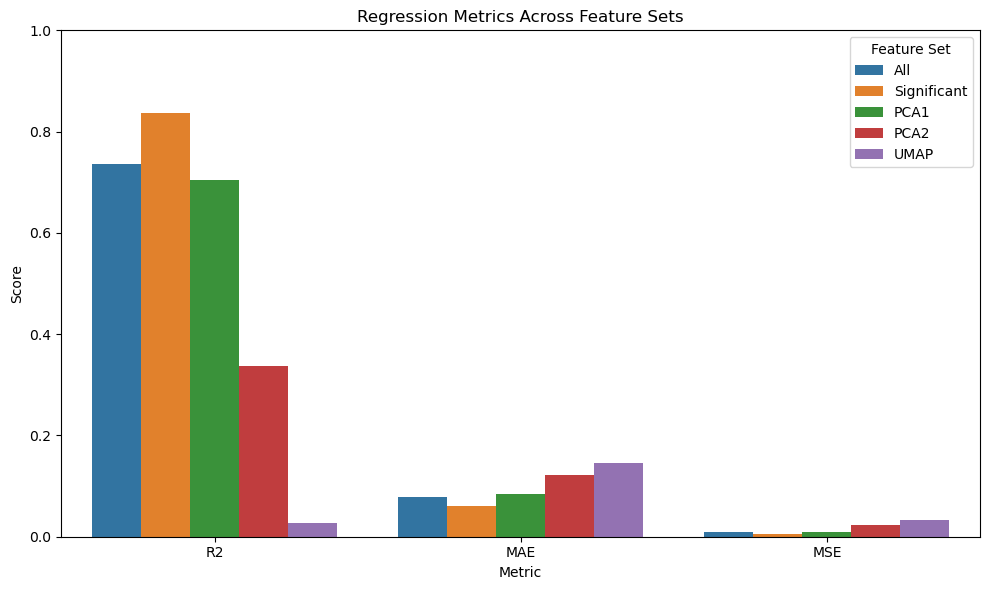

In [42]:

plot_df_reg= all_results_reg.melt(
    id_vars="feature_set", 
    value_vars=["R2", "MAE", "MSE"],
    var_name="Metric", 
    value_name="Value"
)


plt.figure(figsize=(10,6))
sns.barplot(data=plot_df_reg, x="Metric", y="Value", hue="feature_set")
plt.ylim(0,1)  
plt.title("Regression Metrics Across Feature Sets")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.legend(title="Feature Set")
plt.tight_layout()
plt.show()


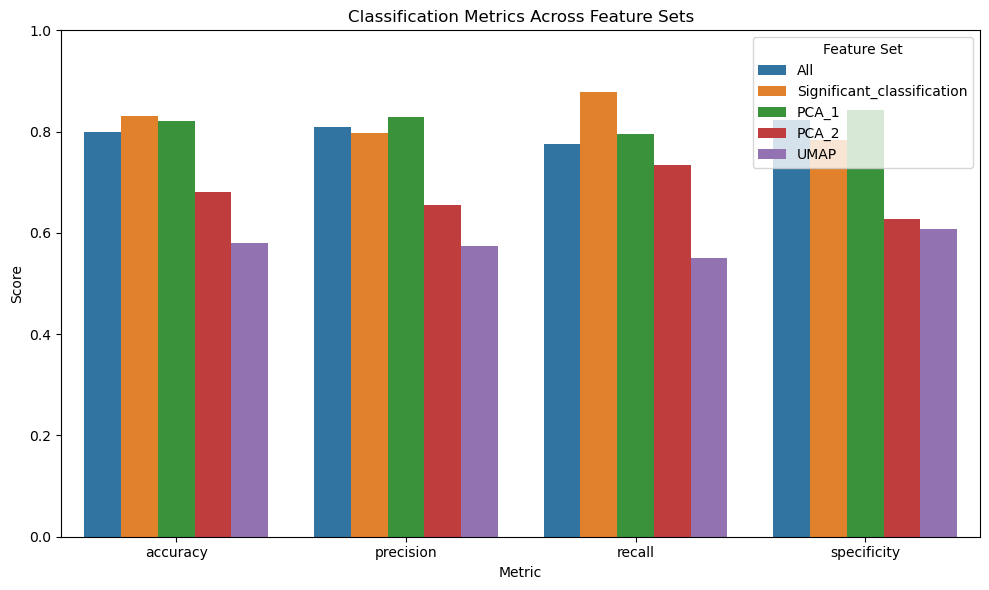

In [ ]:
all_results_class = pd.concat([
    results_classification_all,
    results_classification_significant,
    results_classification_PCA1,
    results_classification_PCA2,
    results_classification_umap
], ignore_index=True)


plot_df_class = all_results_class.melt(
    id_vars="feature_set", 
    value_vars=["accuracy", "precision", "recall", "specificity"], 
    var_name="Metric", 
    value_name="Value"
)

plt.figure(figsize=(10,6))
sns.barplot(data=plot_df_class, x="Metric", y="Value", hue="feature_set")
plt.ylim(0,1)  
plt.title("Classification Metrics Across Feature Sets")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.legend(title="Feature Set")
plt.tight_layout()
plt.show()


In [44]:
all_results_class

,feature_set,accuracy,precision,recall,specificity
0,All,0.80,0.808511,0.775510,0.823529
1,Significant_classification,0.83,0.796296,0.877551,0.784314
2,PCA_1,0.82,0.829787,0.795918,0.843137
3,PCA_2,0.68,0.654545,0.734694,0.627451
4,UMAP,0.58,0.574468,0.551020,0.607843


In [45]:
all_results_reg


,feature_set,R2,MAE,MSE,scaled
0,All,0.736143,0.078663,0.009045,True
1,Significant,0.837390,0.061039,0.005574,True
2,PCA1,0.705018,0.084446,0.010111,False
3,PCA2,0.338060,0.120970,0.022690,False
4,UMAP,0.027907,0.146029,0.033322,False


In [48]:
confusion_matrices = {
    "All": cm_all,
    "Significant": cm_significant,
    "PCA_1": cm_PCA1,
    "PCA_2": cm_PCA2,
    "UMAP": cm_umap
}

n= len(confusion_matrices)

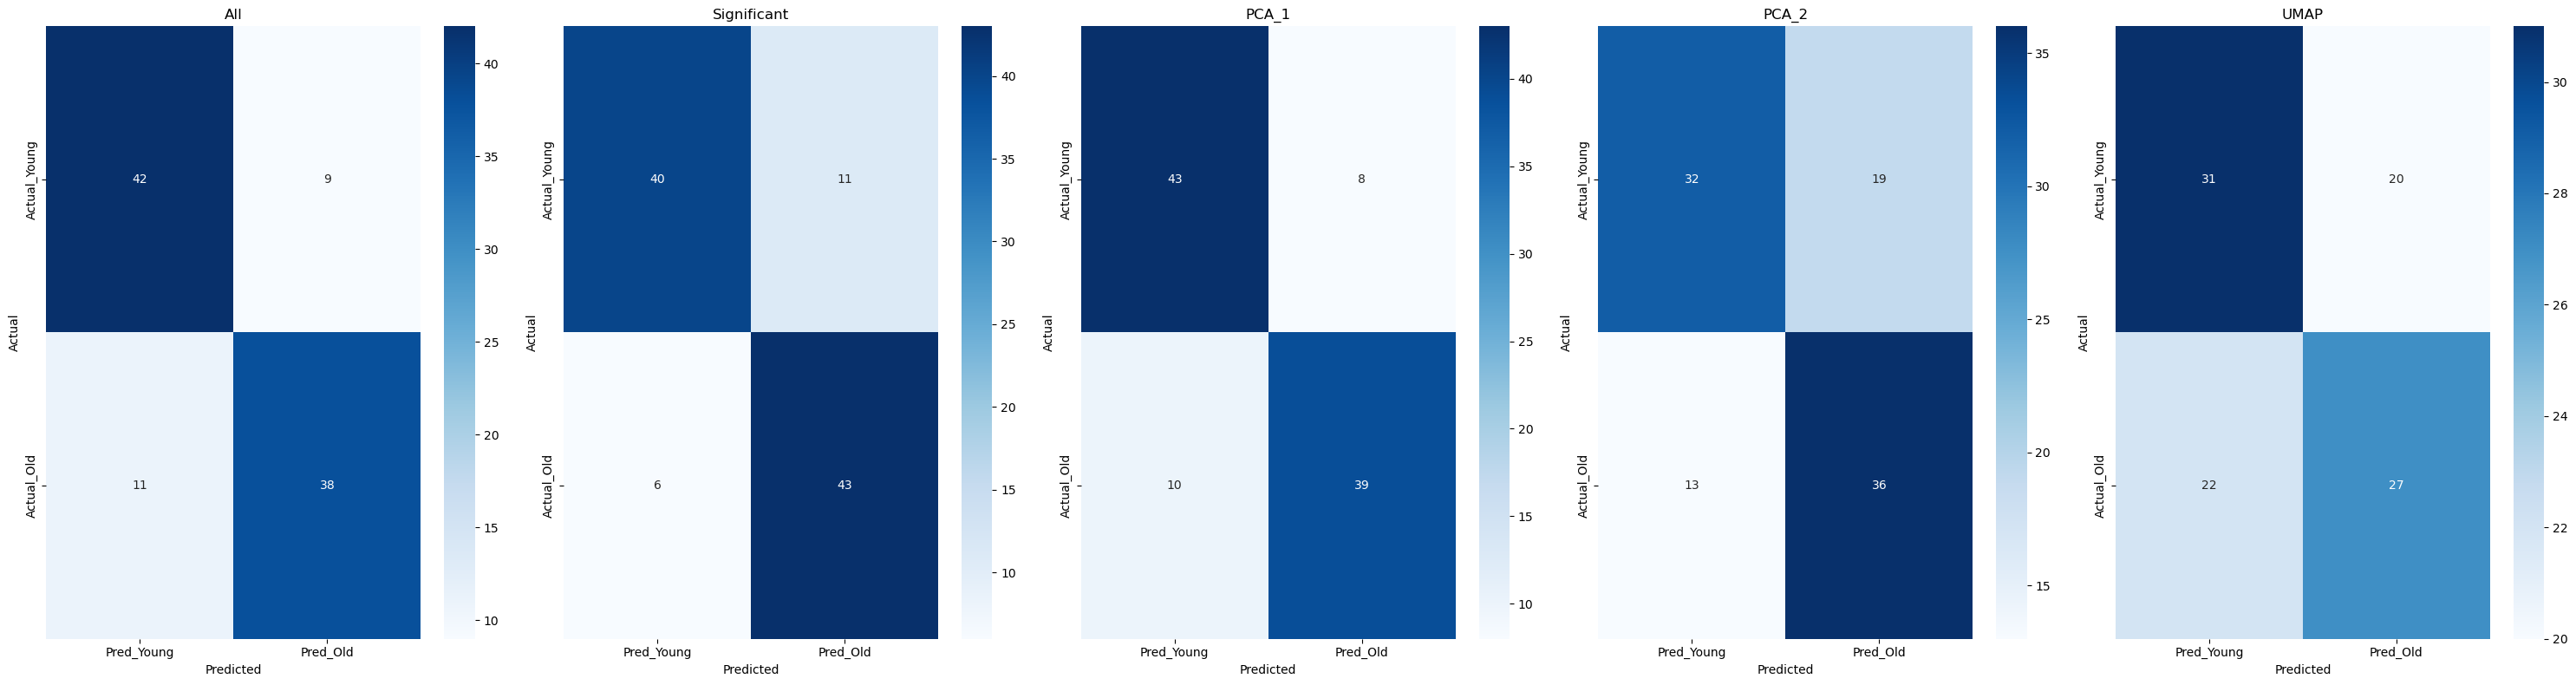

In [49]:
fig, axes = plt.subplots(1, n, figsize=(6*n, 8))

for ax, (feature_set, cm_df) in zip(axes, confusion_matrices.items()):
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(feature_set)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()


# 6. Discussion 

 # Question 1 


### Key Interpretations

- **Constipation**
  - Strong positive correlation with intestinal organ age (`r = 0.825`), suggesting that higher constipation scores are associated with older intestinal age.
  - Positive correlation with motor symptoms (UPDRS_III, `r = 0.675`).
  - Strong negative correlation with hyposmia (`r = -0.908`), indicating co-occurrence of non-motor PD symptoms.

- **Hyposmia**
  - Negative correlation with intestinal organ age (`r = -0.741`), linking worse smell function to older intestinal age.
  - Negative correlation with UPDRS_III (`r = -0.694`).
  - Strong negative correlation with constipation (`r = -0.908`).

- **UPDRS_III (motor symptoms)**
  - Moderate positive correlation with intestinal organ age (`r = 0.525`).
  - Positive correlation with constipation and negative correlation with hyposmia, showing interaction between motor and non-motor symptoms.

- **Intestinal Organ Age**
  - Strongest correlations with **constipation** (`0.825`) and **hyposmia** (`-0.741`).
  - Moderate correlation with motor symptoms (`0.525`).

**Conclusion:** Non-motor symptoms such as constipation and hyposmia are strongly associated with intestinal organ age, suggesting that they may serve as early indicators of intestinal or systemic aging in Parkinson's disease. Motor symptoms also correlate but to a lesser extent.

# Question 2

## Regression 
### Interpretation:
Significant features clearly outperform the rest:
Highest R² (0.837) → explains ~84% of variance
Lowest MAE (0.061) → smallest average error
Lowest MSE (0.006) → lowest squared error overall
All features is second best (R² 0.736), so including all features is okay but slightly worse.
PCA1, PCA2, UMAP perform poorly in regression here:
PCA1 R² is lower than Significant
PCA2 and UMAP are very bad (R² ~0.34 and 0.03), showing dimensionality reduction hurt predictive power
### Best choice for regression: Significant features

## Classification 
### Interpretation:
PCA_1 and Significant_classification give the highest accuracy (0.83).
PCA_1 has higher precision (0.848) and specificity (0.863) than Significant, which means it is better at correctly identifying negatives and avoiding false positives.
Significant_classification has slightly higher recall (0.878), so it is better at capturing positives.

### Best choice depends on what you value:
If you want overall balanced performance, PCA_1 is slightly stronger (high accuracy, precision, and specificity).
If you want to maximize recall (catch as many positives as possible), Significant_classification is slightly better.
Worst: UMAP, low accuracy, precision, recall, and specificity (~0.58–0.61).